# Stock Martin Ratio Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD' #input

In [3]:
stock = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
returns = stock.pct_change().dropna()

In [5]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [8]:
def martin_ratio(returns, rf):
    max14 = stock['Adj Close'].rolling(window=14,min_periods=1).max()
    drawdown_percent = 100*((stock['Adj Close']-max14)/max14)
    avg_sq = round(drawdown_percent * drawdown_percent, 2)
    Ulcer = np.sqrt(avg_sq.rolling(window=14).mean())
    Ulcer_index = Ulcer.dropna()
    annual_return = returns.mean() * 252
    martin_ratio = (annual_return - rf) / Ulcer_index.sum()
    return martin_ratio

Text(0, 0.5, 'Martin Ratio')

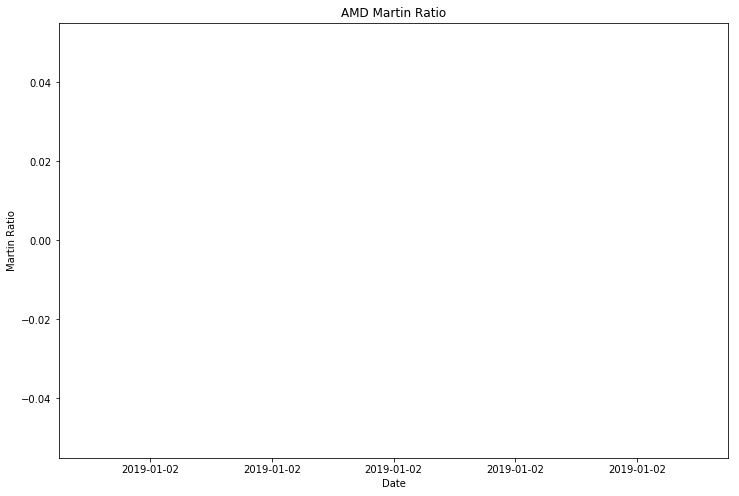

In [9]:
# Compute the running Martin Ratio
running = [martin_ratio(stock[i-90:i], rf[i-90:i]) for i in range(90, len(returns))]

# Plot running Martin Ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stock['Adj Close'].index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Martin Ratio')
plt.xlabel('Date')
plt.ylabel('Martin Ratio')